In [72]:
import pandas as pd
import matplotlib.pyplot as plt

#reading data from csv files and creating one dataframe
df1 = pd.read_csv("2021-06-15-survey.csv")
df2 = pd.read_csv("2022-06-14-survey.csv")
df3 = pd.read_csv("2023-06-13-survey.csv")
df_list = [df1, df2, df3]
combined_df = pd.concat(df_list)
combined_df.reset_index(drop=True, inplace=True)

#set count to 1 for each row so they can be summed
combined_df["Count"] = 1

#display head of dataframe to get idea of columns
combined_df.head()

,Timestamp,Operating System,CPU Cycle Rate (in GHz),CPU Number of Cores,RAM (in GB),Hard Drive Size (in GB),GPU (short description),CPU Number of Cores (int),GPU (short description as a string),GPU CUDA Number of Cores (int),Count
0,6/12/2021 23:05:22,Windows 10,1.8,4.0,8,256,intel uhd 620,NaN,NaN,NaN,1
1,6/13/2021 20:36:02,Windows 10,2.8,4.0,16,460,Intel(R) Iris(R) Xe Graphics,NaN,NaN,NaN,1
2,6/13/2021 22:31:11,MacOS,3.1,2.0,8,512,Intel Iris Plus Graphics 650,NaN,NaN,NaN,1
3,6/14/2021 13:31:30,Windows 10,3.5,4.0,16,1000,NVIDIA GeForce GTX 1070 Ti,NaN,NaN,NaN,1
4,6/14/2021 14:13:55,MacOS,1.6,2.0,8,256,Intel HD Graphics 6000 1536 MB,NaN,NaN,NaN,1


(array([ 0., 20., 22.,  4.,  9.]),
 array([ 0.,  2.,  4.,  6.,  8., 10.]),
 <BarContainer object of 5 artists>)

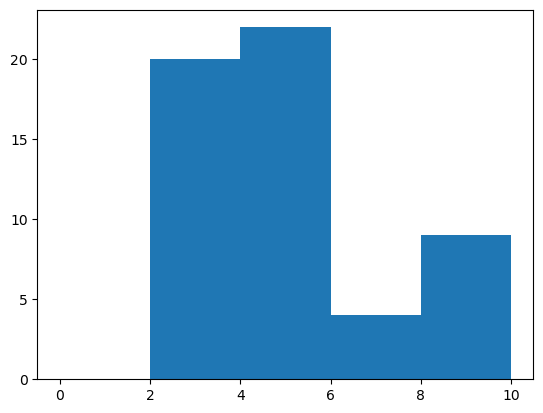

In [70]:
#create histogram for cpu cores
cpu_cores_data = combined_df["CPU Number of Cores"].dropna()
cpu_cores_list = cpu_cores_data.tolist()
bins1 = [0, 2, 4, 6, 8, 10]
plt.hist(cpu_cores_list, bins=bins1)

(array([66., 64., 47.,  2.,  1.]),
 array([   0.,  256.,  512., 1024., 2048., 4096.]),
 <BarContainer object of 5 artists>)

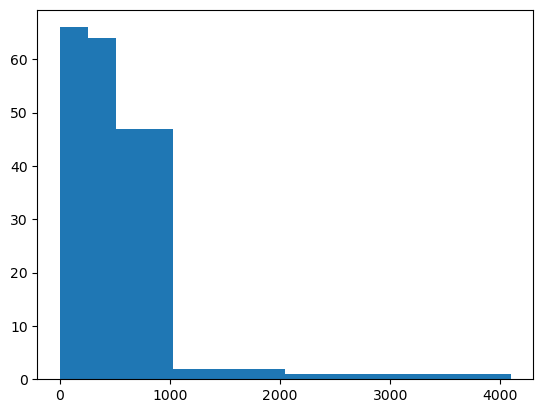

In [60]:
#create histogram for hard drive size
hd_data = combined_df["Hard Drive Size (in GB)"].dropna()
hd_list = hd_data.tolist()
bins2 = [0, 256, 512, 1024, 2048, 4096]
plt.hist(hd_list, bins=bins2)

(array([ 0.,  5., 77.,  1., 79.,  1.,  1.,  0., 12.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36.]),
 <BarContainer object of 9 artists>)

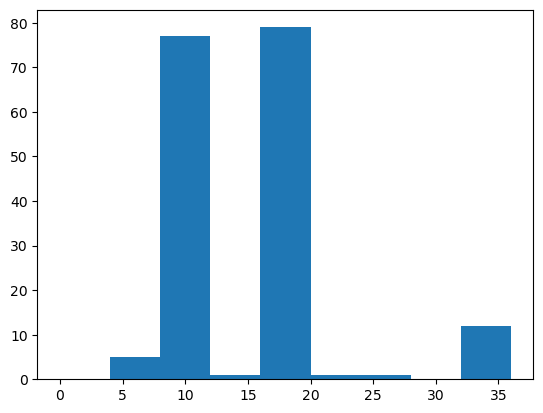

In [67]:
#create histogram for amount of RAM ignoring values over 36
ram_data = combined_df["RAM (in GB)"].dropna()
ram_list = ram_data.tolist()
bins3 = [0, 4, 8, 12, 16, 20, 24, 28, 32, 36]
plt.hist(ram_list, bins=bins3)

(array([ 0.,  1., 12., 27., 43., 45., 41.,  7.,  0.,  2.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

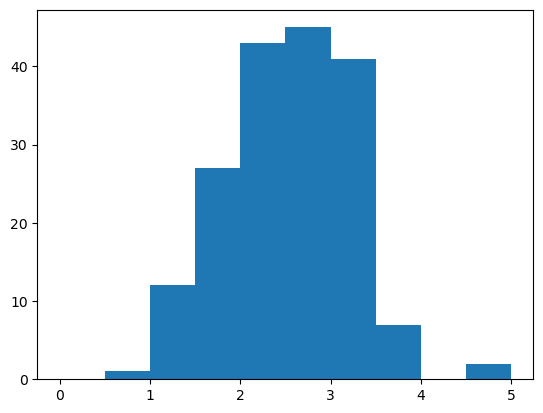

In [69]:
#create histogram for cpu cycle rate ignoring values over 5 GHz
cpu_data = combined_df["CPU Cycle Rate (in GHz)"]
cpu_list = cpu_data.tolist()
bins4 = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
plt.hist(cpu_list, bins=bins4)

(array([35.,  3., 11.,  4.,  8.,  4.,  1.,  2.,  4.,  0.,  0.,  0.,  9.,
         0.,  0.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30.]),
 <BarContainer object of 15 artists>)

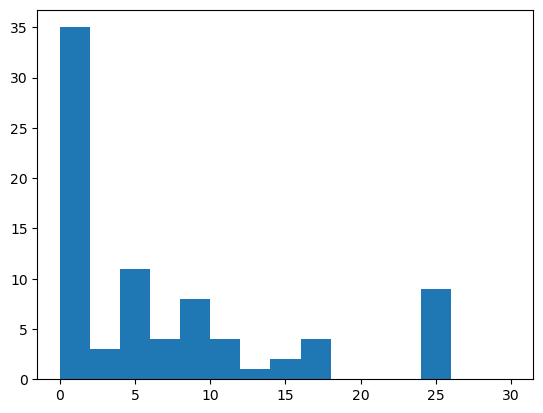

In [52]:
#create histogram for gpu cores ignoring values above 30
gpu_cores_data = combined_df["GPU CUDA Number of Cores (int)"].dropna()
gpu_list = gpu_cores_data.tolist()
bins5 = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
plt.hist(gpu_list, bins=bins5)

In [45]:
#sum data by operating system type and print out
opsys_data = combined_df.groupby(["Operating System"])["Count"].sum()
print(opsys_data)

Operating System
Any Linux                3
I use Mac and Linux      1
MacOS                  107
Windows                 49
Windows 10              20
Name: Count, dtype: int64


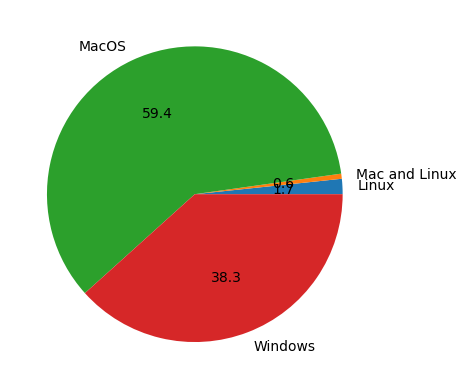

In [71]:
#create pie chart and combine "Windows" with "Windows 10"
labels = ["Linux", "Mac and Linux", "MacOS", "Windows"]
values = [opsys_data[0], opsys_data[1], opsys_data[2], (opsys_data[3]+opsys_data[4])]
plt.pie(values, labels = labels, autopct='%.1f')
plt.show()